In [1]:
import pandas as pd

amazon_df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
display(amazon_df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
#checking once again the columns
amazon_df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [3]:
#verifying if there are null values 
amazon_df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1

In [ ]:
#Generate a frequency table for the product category.
frequency_table = amazon_df['category'].value_counts()
frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [5]:
#Which are the top 5 most listed product categories?
top_5_products= amazon_df['category'].value_counts().head()
top_5_products

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualization

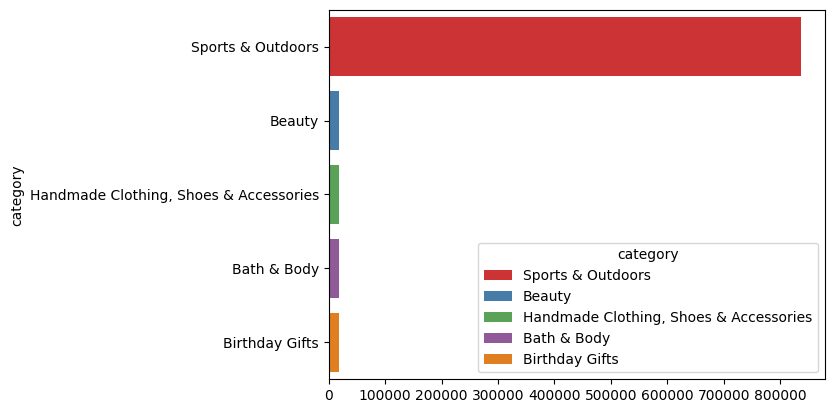

In [6]:
#Part1 - Visualization
#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
import seaborn as sns
ax=sns.barplot(y=top_5_products.index, x=top_5_products.values, palette="Set1", hue=top_5_products.index, legend=True )
sns.move_legend(ax, "lower right")

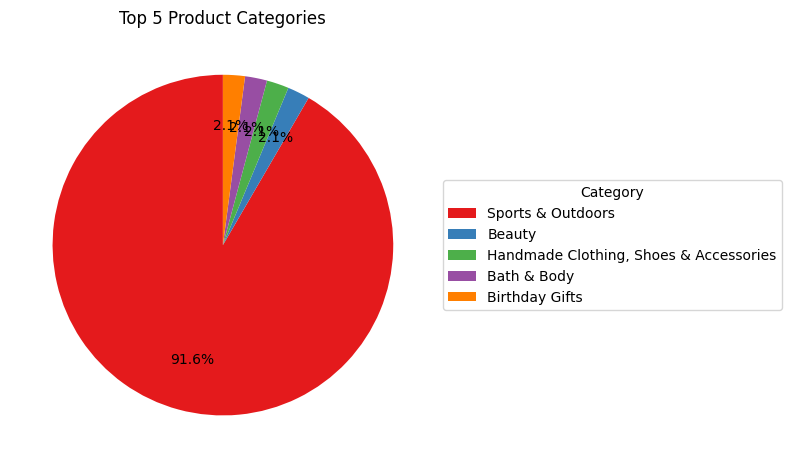

In [7]:
#piechart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

top_5_products.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set1"),
    labels=None,          # remove labels from slices
    pctdistance=0.7       # move percentages inward
)

plt.legend(
    top_5_products.index,
    title="Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.ylabel('')
plt.title("Top 5 Product Categories")
plt.tight_layout()
plt.show()


The 'Sport and Outdoors' products are dominating the 'Product categories' column. 

Part 2

Measures of Centrality:

In [8]:
#Calculate the mean, median, and mode for the price of products.
mean_price= amazon_df['price'].mean()
median_price = amazon_df['price'].median()
mode_price = amazon_df['price'].mode()[0]

mean_price, median_price, mode_price

(np.float64(89.24380943923661), np.float64(19.09), np.float64(9.99))

What's the average price point of products listed? How does this compare with the most common price point (mode)?

The average price point of products listed is 89.24. This is much higher than the most common price point of $9.99, suggesting that while most products are priced around $9.99, there are some higher-priced items that are raising the overall average.

Measures of Dispersion:

In [9]:
#Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = amazon_df['price'].var()
std_dev_price = amazon_df['price'].std()
min_price = amazon_df['price'].min()
max_price = amazon_df['price'].max()
range_price = max_price - min_price
quantiles_price = amazon_df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, range_price, quantiles_price

(np.float64(119445.48532254901),
 np.float64(345.60886175349873),
 np.float64(100000.0),
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

How varied are the product prices? Are there any indicators of a significant spread in prices?


Product prices are highly varied. Most products are priced between $9.99 and $45.99, but the presence of extremely expensive items (up to $100,000) creates a very large range and a high standard deviation of $345.61. This indicates a significant spread in prices, with a few high-priced outliers inflating the overall variability.

Visualizations:

The Histrogram:

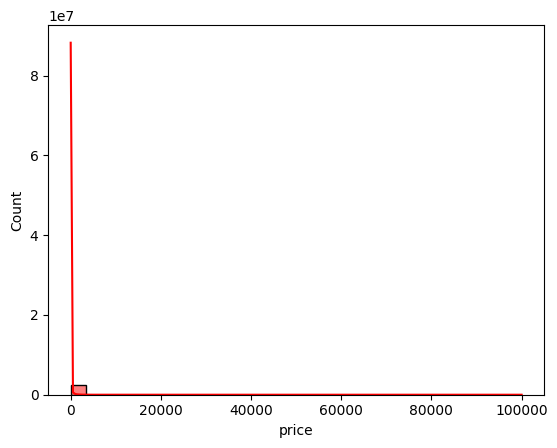

In [10]:
fig, axes = plt.subplots()
sns.histplot(amazon_df['price'], kde=True, bins=30, color="red", ax=axes);
plt.show()

Observations:

The vast majority of products are clustered at the very low end of the price scale (under ~$50).

A few extremely expensive items (up to $100,000) stretch the x-axis enormously.

Because of these outliers, the histogram is compressed on the left, making it hard to see the distribution of the majority of products.

Is there a specific price range where most products fall? 

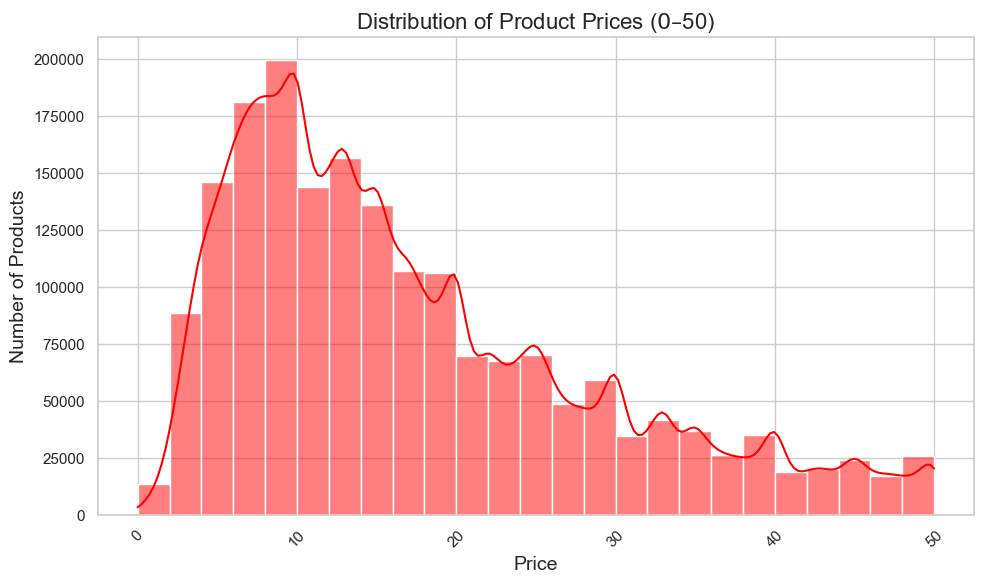

In [ ]:

prices = amazon_df['price']

# Filter prices to $0-$50 range
prices_focus = prices[prices <= 50]

# Seaborn style for readability
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(prices_focus, bins=25, kde=True, color="red")  # histogram with density curve

plt.title("Distribution of Product Prices ($0–$50)", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Number of Products", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Most products (25th–75th percentile: 9.99–45.99) are within this range.

Zooming in removes extreme outliers that compress the main distribution, making it easier to see the bulk of the data.

The visualization shows a positive direction.

The box plot

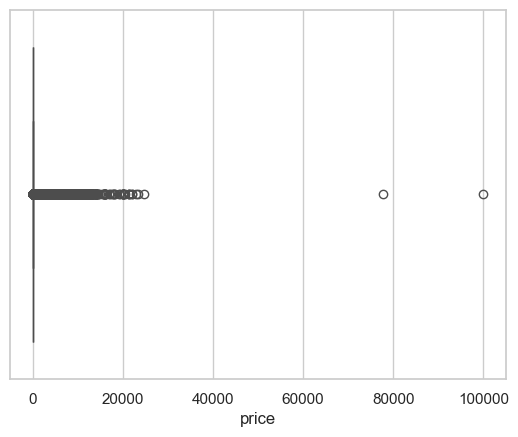

In [13]:
sns.boxplot(x = amazon_df['price'], color="red");

The outliers are showing unusually high prices in the dataset $80,000 or $100,000.

Zoomed-in box-plot

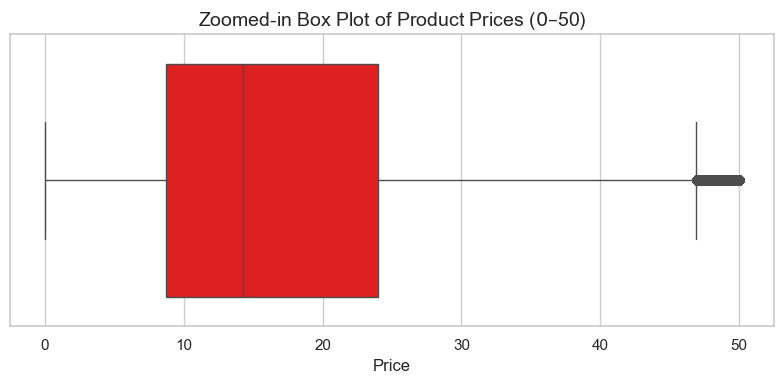

In [22]:

# Assume df['price'] contains your product prices
prices = amazon_df['price']

# Filter prices to $0-$50 range
prices_focus = prices[prices <= 50]

# Set Seaborn style for readability
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,4))
sns.boxplot(x=prices_focus, color="red")

plt.title("Zoomed-in Box Plot of Product Prices ($0–$50)", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.tight_layout()
plt.show()


The zoomed-in box-plot makes the 25th, 50th, and 75th percentiles much clearer.

Part 3

Measures of Centrality:



In [23]:
#Calculate the mean, median, and mode for the rating of products.
mean_rating= amazon_df['stars'].mean()
median_rating = amazon_df['stars'].median()
mode_rating = amazon_df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(np.float64(2.152836472966066), np.float64(0.0), np.float64(0.0))

How do customers generally rate products? Is there a common trend?


There are some products with higher ratings, but these are few compared to the large number of zeros. Most customers give a rating of 0 or don’t rate at all.

Measures of Dispersion:



In [ ]:
variance_rating = amazon_df['stars'].var()
std_dev_rating = amazon_df['stars'].std()
min_rating = amazon_df['stars'].min()
max_rating = amazon_df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = amazon_df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, range_rating, quantiles_rating

(np.float64(4.817434029796864),
 np.float64(2.194865378513421),
 np.float64(5.0),
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Are the ratings consistent, or is there a wide variation in customer feedback?

The variance and the standard deviation are relatively high for a rating scale that likely ranges from 0 to 5. This indicates that ratings are spread out and nottightly clustered around the mean.However, many products receive no or very low ratings and a smaller group of products receives very high ratings.

Shape of the Distribution:



In [24]:
#Calculate the skewness and kurtosis for the rating column.

skewness_rating = amazon_df['stars'].skew()
kurtosis_rating = amazon_df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(np.float64(0.08120735761080881), np.float64(-1.9260061280432994))

Are the ratings normally distributed, or do they lean towards higher or lower values?
The ratings do not significantly lean toward higher or lower values, but they are not normally distributed due to their flat, widely spread shape.

Visualization

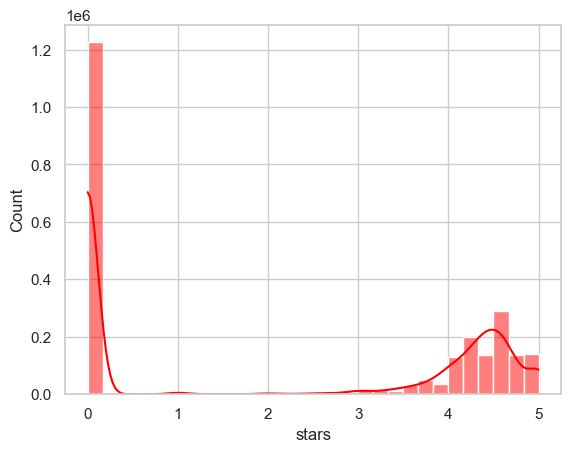

In [21]:
fig, axes = plt.subplots()
sns.histplot(amazon_df['stars'], kde=True, bins=30, color="red", ax=axes);
plt.show()

Is there a specific rating that is more common?

The 0 stars is the most common, followed by 4.5 stars.